# Convolution
See also: https://en.wikipedia.org/wiki/Convolution

There are multiple ways for convolving images using pyclEsperanto.

Let's start by initializing the GPU

In [1]:
import pyclesperanto_prototype as cle

In [2]:
cle.select_device('RTX')

<GeForce RTX 2080 Ti on Platform: NVIDIA CUDA (1 refs)>

## Convolution kernel
To visualize the weights used by the convolution to multiply pixels with surrounding pixel values, we create an image with a single pixel set to 1 (all others are 0) and convolve it. The resulting `kernel` image is also called the `structuring element`.

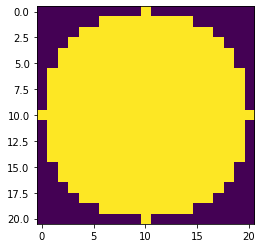

In [3]:
def create_kernel(radius = 10):

    diameter = radius * 2 + 1
    spot = cle.create([diameter, diameter])
    cle.set(spot, 0)
    cle.draw_box(spot, radius, radius, 0, 0, 0, 0)

    kernel = cle.create([diameter, diameter])
    cle.mean_sphere(spot, kernel, radius, radius)

    return kernel

kernel = create_kernel(10)
cle.imshow(kernel)

We now generate an image with random pixel values to convolve it

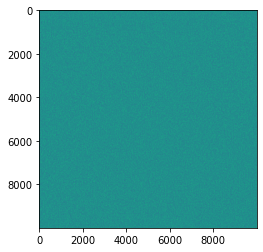

In [4]:
import numpy as np

test_image = cle.push_zyx(np.random.random([10000, 10000]))

cle.imshow(test_image)                        

## Quick benchmarking different convolution strategies
We start by convolving the image with the kernel created above

In [5]:
kernel = create_kernel(10)

import time
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.convolve(test_image, kernel, result_image)
    print("Convolve custom duration: " + str(time.time() - start_time))

Convolve custom duration: 0.014349937438964844
Convolve custom duration: 0.0009644031524658203
Convolve custom duration: 0.0
Convolve custom duration: 0.0
Convolve custom duration: 0.0
Convolve custom duration: 0.0009958744049072266
Convolve custom duration: 0.0
Convolve custom duration: 0.0010027885437011719
Convolve custom duration: 0.0
Convolve custom duration: 0.0009925365447998047


Another strategy is calling the mean_sphere function. This means, we don't us a kernel image internally.

In [6]:
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.mean_sphere(test_image, result_image, 10, 10)
    print("Convolve sphere duration: " + str(time.time() - start_time))

Convolve sphere duration: 0.1239168643951416
Convolve sphere duration: 0.11775708198547363
Convolve sphere duration: 0.11838173866271973
Convolve sphere duration: 0.11770892143249512
Convolve sphere duration: 0.11873149871826172
Convolve sphere duration: 0.1196908950805664
Convolve sphere duration: 0.11900639533996582
Convolve sphere duration: 0.11854362487792969
Convolve sphere duration: 0.11789345741271973
Convolve sphere duration: 0.1184852123260498


A faster version uses mean_box. Note: The structuring element is a rectangle, and not a sphere anymore. This operation is typically faster because this is a separable implementation.

In [7]:
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.mean_box(test_image, result_image, 10, 10)
    print("Convolve box duration: " + str(time.time() - start_time))

Convolve box duration: 0.04290270805358887
Convolve box duration: 0.02291250228881836
Convolve box duration: 0.023266077041625977
Convolve box duration: 0.02461981773376465
Convolve box duration: 0.026160240173339844
Convolve box duration: 0.027770280838012695
Convolve box duration: 0.022873878479003906
Convolve box duration: 0.026557445526123047
Convolve box duration: 0.02364945411682129
Convolve box duration: 0.02354574203491211


# Convolution in 3D

In [8]:
def create_kernel_3d(radius = 10):

    diameter = radius * 2 + 1
    spot = cle.create([diameter, diameter, diameter])
    cle.set(spot, 0)
    cle.draw_box(spot, radius, radius, radius, 0, 0, 0)

    kernel = cle.create([diameter, diameter, diameter])
    cle.mean_sphere(spot, kernel, radius, radius, radius)

    return kernel

kernel = create_kernel_3d(2)
kernel

array([[[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.03030303, 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.03030303, 0.03030303, 0.03030303, 0.        ],
        [0.        , 0.03030303, 0.03030303, 0.03030303, 0.        ],
        [0.        , 0.03030303, 0.03030303, 0.03030303, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.03030303, 0.        , 0.        ],
        [0.        , 0.03030303, 0.03030303, 0.03030303, 0.        ],
        [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303],
        [0.        , 0.03030303, 0.03030303, 0.03030303, 0.        ],
        [0.     

## Quick benchmarking different convolution strategies in 3D
We start by convolving the image with the kernel created above

In [9]:
import numpy as np

test_image = cle.push_zyx(np.random.random([1000, 1000, 100]))
                     

In [10]:
kernel = create_kernel_3d(10)

import time
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.convolve(test_image, kernel, result_image)
    print("Convolve custom duration: " + str(time.time() - start_time))

Convolve custom duration: 0.012964725494384766
Convolve custom duration: 0.0010001659393310547
Convolve custom duration: 0.0
Convolve custom duration: 0.0
Convolve custom duration: 0.0009963512420654297
Convolve custom duration: 0.0
Convolve custom duration: 0.0010290145874023438
Convolve custom duration: 0.0
Convolve custom duration: 0.0009660720825195312
Convolve custom duration: 0.0


Another strategy is calling the mean_sphere function. This means, we don't us a kernel image internally.

In [11]:
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.mean_sphere(test_image, result_image, 10, 10, 10)
    print("Convolve sphere duration: " + str(time.time() - start_time))

Convolve sphere duration: 2.382997989654541
Convolve sphere duration: 2.3828935623168945
Convolve sphere duration: 2.3836264610290527
Convolve sphere duration: 2.3844563961029053
Convolve sphere duration: 2.3858835697174072
Convolve sphere duration: 2.38730525970459
Convolve sphere duration: 2.391307830810547
Convolve sphere duration: 2.3943867683410645
Convolve sphere duration: 2.3956313133239746
Convolve sphere duration: 2.396178722381592


A faster version uses mean_box. Note: The structuring element is a rectangle, and not a sphere anymore. This operation is typically faster because this is a separable implementation.

In [12]:
result_image = None

for i in range(0, 10):
    start_time = time.time()
    result_image = cle.mean_box(test_image, result_image, 10, 10, 10)
    print("Convolve box duration: " + str(time.time() - start_time))

Convolve box duration: 0.07281970977783203
Convolve box duration: 0.05767226219177246
Convolve box duration: 0.056601524353027344
Convolve box duration: 0.05724143981933594
Convolve box duration: 0.05713152885437012
Convolve box duration: 0.05863523483276367
Convolve box duration: 0.0584867000579834
Convolve box duration: 0.05966949462890625
Convolve box duration: 0.05709981918334961
Convolve box duration: 0.058325767517089844
